In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


try:
    raw=pd.read_csv(r"C:\Users\pc\Desktop\Data coll\Week 1\raw_analyst_ratings.csv")
    print("Loaded successfully")
except:
    print("Try again")   

print("Hello")

Loaded successfully
Hello


In [5]:
raw.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1048575 non-null  int64 
 1   headline    1048575 non-null  object
 2   url         1048575 non-null  object
 3   publisher   1048575 non-null  object
 4   date        1048575 non-null  object
 5   stock       1048575 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [7]:
raw['date'] = pd.to_datetime(raw['date'], errors='coerce')

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype                    
---  ------      --------------    -----                    
 0   Unnamed: 0  1048575 non-null  int64                    
 1   headline    1048575 non-null  object                   
 2   url         1048575 non-null  object                   
 3   publisher   1048575 non-null  object                   
 4   date        41473 non-null    datetime64[ns, UTC-04:00]
 5   stock       1048575 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), int64(1), object(4)
memory usage: 48.0+ MB


In [18]:
raw.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [ ]:
#length of each headline in headline_length new col
raw['headline_length'] = raw['headline'].apply(len)

In [ ]:
#statistics for the headline lengths
statistics = raw['headline_length'].describe()
statistics

count    1.048575e+06
mean     7.300076e+01
std      4.029646e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [15]:
raw.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,headline_length
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,71
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,73
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,120
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,84
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,42


In [17]:
print(raw['publisher'].value_counts().to_string())

publisher
Paul Quintaro                                     168435
Lisa Levin                                        139785
Benzinga Newsdesk                                 111281
Charles Gross                                      72892
Monica Gerson                                      61374
Eddie Staley                                       42702
Hal Lindon                                         36445
Juan Lopez                                         21153
Benzinga Staff                                     20926
ETF Professor                                      19812
Vick Meyer                                         18630
Zacks                                              15339
webmaster                                          15231
Benzinga_Newsdesk                                  14357
Jayson Derrick                                     14076
Allie Wickman                                      13295
Shanthi Rexaline                                   12612
Craig Jones          

In [18]:
raw['year'] = raw['date'].dt.year
raw['month'] = raw['date'].dt.month
raw['day'] = raw['date'].dt.day
raw['weekday'] = raw['date'].dt.day_name()

In [20]:
daily_counts =raw['date'].value_counts().sort_index()
daily_counts.describe()

count    27314.000000
mean         1.518379
std          5.962296
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        668.000000
Name: count, dtype: float64

In [22]:
weekday_counts = raw['weekday'].value_counts().loc[
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
]
weekday_counts.describe()

count       7.000000
mean     5924.714286
std      3946.929301
min       208.000000
25%      3612.000000
50%      7746.000000
75%      8415.500000
max      9464.000000
Name: count, dtype: float64

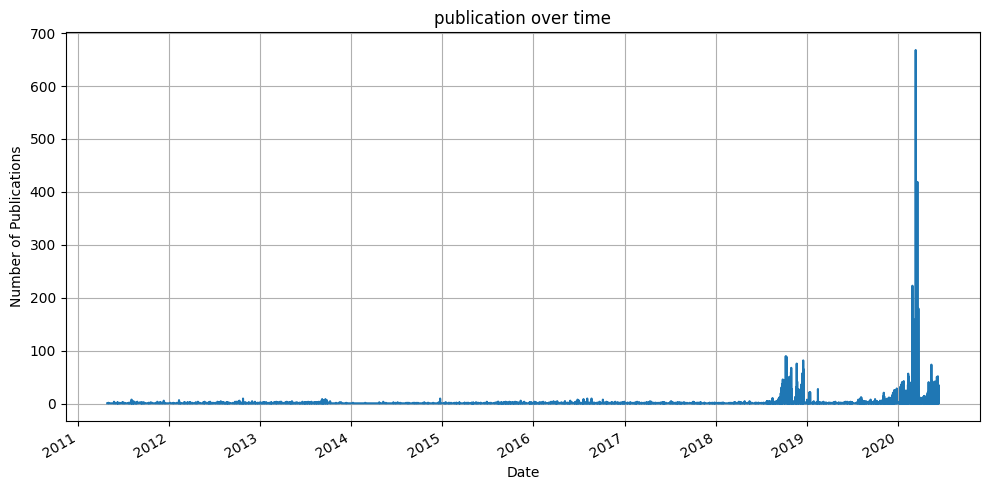

In [24]:
daily_counts.plot(kind='line', title='publication over time', figsize=(10, 5))
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.grid(True)
plt.tight_layout()
plt.show()

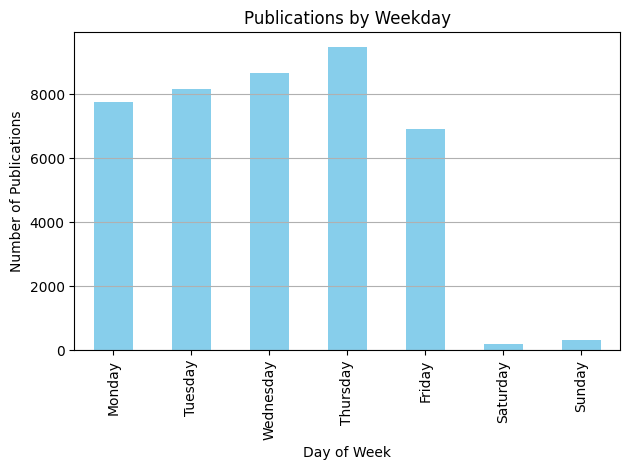

In [25]:
weekday_counts.plot(kind='bar', title='Publications by Weekday', color='skyblue')
plt.xlabel('Day of Week')
plt.ylabel('Number of Publications')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [26]:
raw.head()

,Unnamed: 0,headline,url,publisher,date,stock,headline_length,year,month,day,weekday
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,39,2020.0,6.0,5.0,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,42,2020.0,6.0,3.0,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,29,2020.0,5.0,26.0,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,44,2020.0,5.0,22.0,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,87,2020.0,5.0,22.0,Friday
